# 1. Import

In [35]:
# @title Fichier fonctions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


def etude_fichier_complet(df):
    # Étape 1 : Aperçu des données
    print("Aperçu des premières lignes :")
    print(df.sample(3))

    # Étape 2 : Informations sur les colonnes et les types de données
    print("\nInformations sur les colonnes et les types de données :")
    print(df.info())

    # Étape 3 : Statistiques descriptives
    print("\nStatistiques descriptives :")
    print(df.describe())

    # Étape 4 : Gestion des données manquantes
    print("\nGestion des données manquantes :")
    print(df.isnull().sum())

    # Étape 5 : Analyse exploratoire des données (EDA)
    print("\nAnalyse exploratoire des données :")

    # Distribution des variables numériques
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution de {col}')
        plt.show()

    # Analyse des variables catégoriques
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'Fréquence de {col}')
        plt.xticks(rotation=45)
        plt.show()


def etude_fichier(df):
    print("Nombre de colonnes :", df.shape)
    print()
    print("Le type est : \n", df.dtypes)
    print()
    print('Nombre de valeurs uniques :')
    print(df.nunique())
    print()
    print('Le nombre de valeurs manquantes :\n', df.isnull().sum())

def analyse_statistique(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    stats = df.describe(include='all')

    stats.loc['median'] = df[numeric_cols].median()
    stats.loc['skewness'] = df[numeric_cols].skew()
    stats.loc['kurtosis'] = df[numeric_cols].kurtosis()

    return stats

def identifier_differences_entre_cles(df1, df2, keys_df1=None, keys_df2=None):
    if keys_df1 is None:
        keys_df1 = [df1.columns[0]]
    if keys_df2 is None:
        keys_df2 = [df2.columns[0]]

    unique_keys_df1 = set(df1[keys_df1].drop_duplicates().apply(tuple, axis=1))
    unique_keys_df2 = set(df2[keys_df2].drop_duplicates().apply(tuple, axis=1))

    keys_only_in_df1 = unique_keys_df1 - unique_keys_df2
    keys_only_in_df2 = unique_keys_df2 - unique_keys_df1

    print("Nombre de clés absentes dans DF1:", len(keys_only_in_df1))
    print("Nombre de clés absentes dans DF2:", len(keys_only_in_df2))

def etudier_jointures(df1, df2):
    id_columns_df1 = [col for col in df1.columns if 'id' in col.lower()]
    id_columns_df2 = [col for col in df2.columns if 'id' in col.lower()]

    results = {}

    for on_column_df1 in id_columns_df1:
        for on_column_df2 in id_columns_df2:
            inner_unique_keys = len(pd.merge(df1, df2, how='inner', left_on=on_column_df1, right_on=on_column_df2).drop_duplicates(subset=on_column_df1))
            left_unique_keys = len(pd.merge(df1, df2, how='left', left_on=on_column_df1, right_on=on_column_df2).drop_duplicates(subset=on_column_df1))
            right_unique_keys = len(pd.merge(df1, df2, how='right', left_on=on_column_df1, right_on=on_column_df2).drop_duplicates(subset=on_column_df1))
            outer_unique_keys = len(pd.merge(df1, df2, how='outer', left_on=on_column_df1, right_on=on_column_df2).drop_duplicates(subset=on_column_df1))

            results[f"{on_column_df1} - {on_column_df2}"] = {
                'inner': inner_unique_keys,
                'left': left_unique_keys,
                'right': right_unique_keys,
                'outer': outer_unique_keys
            }

    for key, values in results.items():
        print(f"Colonnes de jointure : {key}")
        print("Nombre de clés uniques après jointure interne:", values['inner'])
        print("Nombre de clés uniques après jointure à gauche:", values['left'])
        print("Nombre de clés uniques après jointure à droite:", values['right'])
        print("Nombre de clés uniques après jointure externe:", values['outer'])
        print()

def traiter_valeurs_manquantes(df, method='mean', columns=None):
    if method == 'mean':
        if columns is None:
            return df.fillna(df.mean())
        else:
            return df.fillna(df.mean()[columns])
    elif method == 'median':
        if columns is None:
            return df.fillna(df.median())
        else:
            return df.fillna(df.median()[columns])
    elif method == 'mode':
        if columns is None:
            return df.fillna(df.mode().iloc[0])
        else:
            return df.fillna(df.mode().iloc[0][columns])
    else:
        return df.fillna(method=method)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


def etude_fichier_complet(df):
    # Étape 1 : Aperçu des données
    print("Aperçu des premières lignes :")
    print(df.sample(3))

    # Étape 2 : Informations sur les colonnes et les types de données
    print("\nInformations sur les colonnes et les types de données :")
    print(df.info())

    # Étape 3 : Statistiques descriptives
    print("\nStatistiques descriptives :")
    print(df.describe())

    # Étape 4 : Gestion des données manquantes
    print("\nGestion des données manquantes :")
    print(df.isnull().sum())

    # Étape 5 : Analyse exploratoire des données (EDA)
    print("\nAnalyse exploratoire des données :")

    # Distribution des variables numériques
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution de {col}')
        plt.show()

    # Analyse des variables catégoriques
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'Fréquence de {col}')
        plt.xticks(rotation=45)
        plt.show()


def etude_fichier(df):
    print("Nombre de colonnes :", df.shape)
    print()
    print("Le type est : \n", df.dtypes)
    print()
    print('Nombre de valeurs uniques :')
    print(df.nunique())
    print()
    print('Le nombre de valeurs manquantes :\n', df.isnull().sum())

def analyse_statistique(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    stats = df.describe(include='all')

    stats.loc['median'] = df[numeric_cols].median()
    stats.loc['skewness'] = df[numeric_cols].skew()
    stats.loc['kurtosis'] = df[numeric_cols].kurtosis()

    return stats

def identifier_differences_entre_cles(df1, df2, keys_df1=None, keys_df2=None):
    if keys_df1 is None:
        keys_df1 = [df1.columns[0]]
    if keys_df2 is None:
        keys_df2 = [df2.columns[0]]

    unique_keys_df1 = set(df1[keys_df1].drop_duplicates().apply(tuple, axis=1))
    unique_keys_df2 = set(df2[keys_df2].drop_duplicates().apply(tuple, axis=1))

    keys_only_in_df1 = unique_keys_df1 - unique_keys_df2
    keys_only_in_df2 = unique_keys_df2 - unique_keys_df1

    print("Nombre de clés absentes dans DF1:", len(keys_only_in_df1))
    print("Nombre de clés absentes dans DF2:", len(keys_only_in_df2))

def etudier_jointures(df1, df2):
    id_columns_df1 = [col for col in df1.columns if 'id' in col.lower()]
    id_columns_df2 = [col for col in df2.columns if 'id' in col.lower()]

    results = {}

    for on_column_df1 in id_columns_df1:
        for on_column_df2 in id_columns_df2:
            inner_unique_keys = len(pd.merge(df1, df2, how='inner', left_on=on_column_df1, right_on=on_column_df2).drop_duplicates(subset=on_column_df1))
            left_unique_keys = len(pd.merge(df1, df2, how='left', left_on=on_column_df1, right_on=on_column_df2).drop_duplicates(subset=on_column_df1))
            right_unique_keys = len(pd.merge(df1, df2, how='right', left_on=on_column_df1, right_on=on_column_df2).drop_duplicates(subset=on_column_df1))
            outer_unique_keys = len(pd.merge(df1, df2, how='outer', left_on=on_column_df1, right_on=on_column_df2).drop_duplicates(subset=on_column_df1))

            results[f"{on_column_df1} - {on_column_df2}"] = {
                'inner': inner_unique_keys,
                'left': left_unique_keys,
                'right': right_unique_keys,
                'outer': outer_unique_keys
            }

    for key, values in results.items():
        print(f"Colonnes de jointure : {key}")
        print("Nombre de clés uniques après jointure interne:", values['inner'])
        print("Nombre de clés uniques après jointure à gauche:", values['left'])
        print("Nombre de clés uniques après jointure à droite:", values['right'])
        print("Nombre de clés uniques après jointure externe:", values['outer'])
        print()

def traiter_valeurs_manquantes(df, method='mean', columns=None):
    if method == 'mean':
        if columns is None:
            return df.fillna(df.mean())
        else:
            return df.fillna(df.mean()[columns])
    elif method == 'median':
        if columns is None:
            return df.fillna(df.median())
        else:
            return df.fillna(df.median()[columns])
    elif method == 'mode':
        if columns is None:
            return df.fillna(df.mode().iloc[0])
        else:
            return df.fillna(df.mode().iloc[0][columns])
    else:
        return df.fillna(method=method)

def etude_outliers(df, seuil=2.0):
    '''
    Fonction pour détecter et afficher le pourcentage d'outliers dans toutes les colonnes numériques d'un DataFrame,
    en utilisant le Z-score.

    Paramètres :
    df (DataFrame) : DataFrame Pandas.
    seuil (float) : Seuil pour le Z-score utilisé pour définir un outlier. Par défaut à 2.0.
    '''

    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        series = df[col]
        z_scores = np.abs((series - series.mean()) / series.std())
        outliers_mask = z_scores > seuil
        outliers_percentage = (outliers_mask.mean() * 100).round(2)

        print(f"Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil {seuil} dans la colonne '{col}' est {outliers_percentage}%")

def plot_skewness_kurtosis(data, column):
    skewness = data[column].skew()
    kurtosis = data[column].kurtosis()

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.axvline(x=data[column].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.title(f'Skewness: {skewness:.2f}')

    plt.subplot(1, 2, 2)
    sns.histplot(data[column], kde=True)
    plt.axvline(x=data[column].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=data[column].mean() + data[column].std(), color='g', linestyle='dashed', linewidth=2)
    plt.axvline(x=data[column].mean() - data[column].std(), color='g', linestyle='dashed', linewidth=2)
    plt.axvline(x=data[column].mean() + 2 * data[column].std(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(x=data[column].mean() - 2 * data[column].std(), color='b', linestyle='dashed', linewidth=2)
    plt.title(f'Kurtosis: {kurtosis:.2f}')

    plt.tight_layout()

    if skewness > 0:
        skewness_analysis = "La distribution est inclinée positivement vers la droite (queue à droite)."
    elif skewness < 0:
        skewness_analysis = "La distribution est inclinée positivement vers la gauche (queue à gauche)."
    else:
        skewness_analysis = "La distribution est parfaitement symétrique."

    if kurtosis > 0:
        kurtosis_analysis = "La distribution est leptokurtique, avec des pics plus fins et des queues plus épaisses."
    elif kurtosis < 0:
        kurtosis_analysis = "La distribution est platykurtique, avec des pics plus larges et des queues plus minces."
    else:
        kurtosis_analysis = "La distribution est mésokurtique, similaire à une distribution normale."

    print("Analyse de la répartition (skewness):", skewness_analysis)
    print("Analyse de l'aplatissement (kurtosis):", kurtosis_analysis)

    plt.show()

def correlation_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matrice de Corrélation")
    plt.show()

def visualiser_valeurs_manquantes(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Visualisation des Valeurs Manquantes")
    plt.show()

def encoder_variables_categorielles(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include='object').columns
    return pd.get_dummies(df, columns=columns, drop_first=True)

def reduire_dimension_pca(df, n_components=None):
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df.select_dtypes(include=[np.number]))
    columns = [f"PC{i+1}" for i in range(components.shape[1])]
    df_pca = pd.DataFrame(components, columns=columns)
    return pd.concat([df.drop(columns=df.select_dtypes(include=[np.number]).columns), df_pca], axis=1)

def plot_skewness_kurtosis(data, column):
    skewness = data[column].skew()
    kurtosis = data[column].kurtosis()

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.axvline(x=data[column].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.title(f'Skewness: {skewness:.2f}')

    plt.subplot(1, 2, 2)
    sns.histplot(data[column], kde=True)
    plt.axvline(x=data[column].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=data[column].mean() + data[column].std(), color='g', linestyle='dashed', linewidth=2)
    plt.axvline(x=data[column].mean() - data[column].std(), color='g', linestyle='dashed', linewidth=2)
    plt.axvline(x=data[column].mean() + 2 * data[column].std(), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(x=data[column].mean() - 2 * data[column].std(), color='b', linestyle='dashed', linewidth=2)
    plt.title(f'Kurtosis: {kurtosis:.2f}')

    plt.tight_layout()

    if skewness > 0:
        skewness_analysis = "La distribution est inclinée positivement vers la droite (queue à droite)."
    elif skewness < 0:
        skewness_analysis = "La distribution est inclinée positivement vers la gauche (queue à gauche)."
    else:
        skewness_analysis = "La distribution est parfaitement symétrique."

    if kurtosis > 0:
        kurtosis_analysis = "La distribution est leptokurtique, avec des pics plus fins et des queues plus épaisses."
    elif kurtosis < 0:
        kurtosis_analysis = "La distribution est platykurtique, avec des pics plus larges et des queues plus minces."
    else:
        kurtosis_analysis = "La distribution est mésokurtique, similaire à une distribution normale."

    print("Analyse de la répartition (skewness):", skewness_analysis)
    print("Analyse de l'aplatissement (kurtosis):", kurtosis_analysis)

    plt.show()

def correlation_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matrice de Corrélation")
    plt.show()

def visualiser_valeurs_manquantes(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Visualisation des Valeurs Manquantes")
    plt.show()

def encoder_variables_categorielles(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include='object').columns
    return pd.get_dummies(df, columns=columns, drop_first=True)

def reduire_dimension_pca(df, n_components=None):
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df.select_dtypes(include=[np.number]))
    columns = [f"PC{i+1}" for i in range(components.shape[1])]
    df_pca = pd.DataFrame(components, columns=columns)
    return pd.concat([df.drop(columns=df.select_dtypes(include=[np.number]).columns), df_pca], axis=1)

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# import fonctions as fc
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [38]:
# Charger les données à partir d'un fichier CSV
# file_path = 'C:\\Users\\antoi\\OneDrive\\Bureau\\OC drive\\OC\\P10\\DATA\\billets.csv'
file_path = '/content/drive/MyDrive/OC/P10/DATA/billets.csv'
data = pd.read_csv(file_path, delimiter=';')

# 2. Analyse descriptive

## Découverte

In [39]:
# Copie 'is_genuine' dans une autre variable avant de le supprimer
y_true = data['is_genuine'].copy()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [41]:
data.dtypes.value_counts()

float64    6
bool       1
dtype: int64

In [42]:
data.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [43]:
data.sample(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
701,True,172.03,103.64,103.59,3.63,3.04,112.96
963,True,172.09,103.65,103.25,3.96,2.85,113.20
1305,False,172.10,104.36,104.08,4.96,3.46,111.93


In [44]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [45]:
data.describe().round(1)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.0,1500.0,1500.0,1463.0,1500.0,1500.0
mean,172.0,104.0,103.9,4.5,3.2,112.7
std,0.3,0.3,0.3,0.7,0.2,0.9
min,171.0,103.1,102.8,3.0,2.3,109.5
25%,171.8,103.8,103.7,4.0,3.0,112.0
50%,172.0,104.0,103.9,4.3,3.1,113.0
75%,172.2,104.2,104.2,4.9,3.3,113.3
max,173.0,104.9,105.0,6.9,3.9,114.4


### MINMAXSCALER

In [46]:
from sklearn.preprocessing import MinMaxScaler
# Créer l'objet MinMaxScaler
scaler = MinMaxScaler()

# Sélectionner les colonnes numériques
column_names = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Appliquer le MinMaxScaler sur les colonnes numériques
data[column_names] = scaler.fit_transform(data[column_names])

In [47]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747
1,True,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273
2,True,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414
3,True,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121
4,True,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162


## Visualisation des données numériques

### étude du nombre de vrai/faux

In [48]:
#Nombre de vrais/faux billets :
count = data['is_genuine'].value_counts()
print(count)
print()

True     1000
False     500
Name: is_genuine, dtype: int64



## Etude de la distribution

### test de la distribution

In [49]:
from scipy.stats import shapiro

# Pour chaque colonne dans vos données
for col in data.columns:
    _, p_value = shapiro(data[col])
    if p_value > 0.05:
        print(f'{col} suit probablement une distribution normale')
    else:
        print(f'{col} ne suit probablement pas une distribution normale')

is_genuine ne suit probablement pas une distribution normale
diagonal suit probablement une distribution normale
height_left suit probablement une distribution normale
height_right suit probablement une distribution normale
margin_low suit probablement une distribution normale
margin_up ne suit probablement pas une distribution normale
length ne suit probablement pas une distribution normale


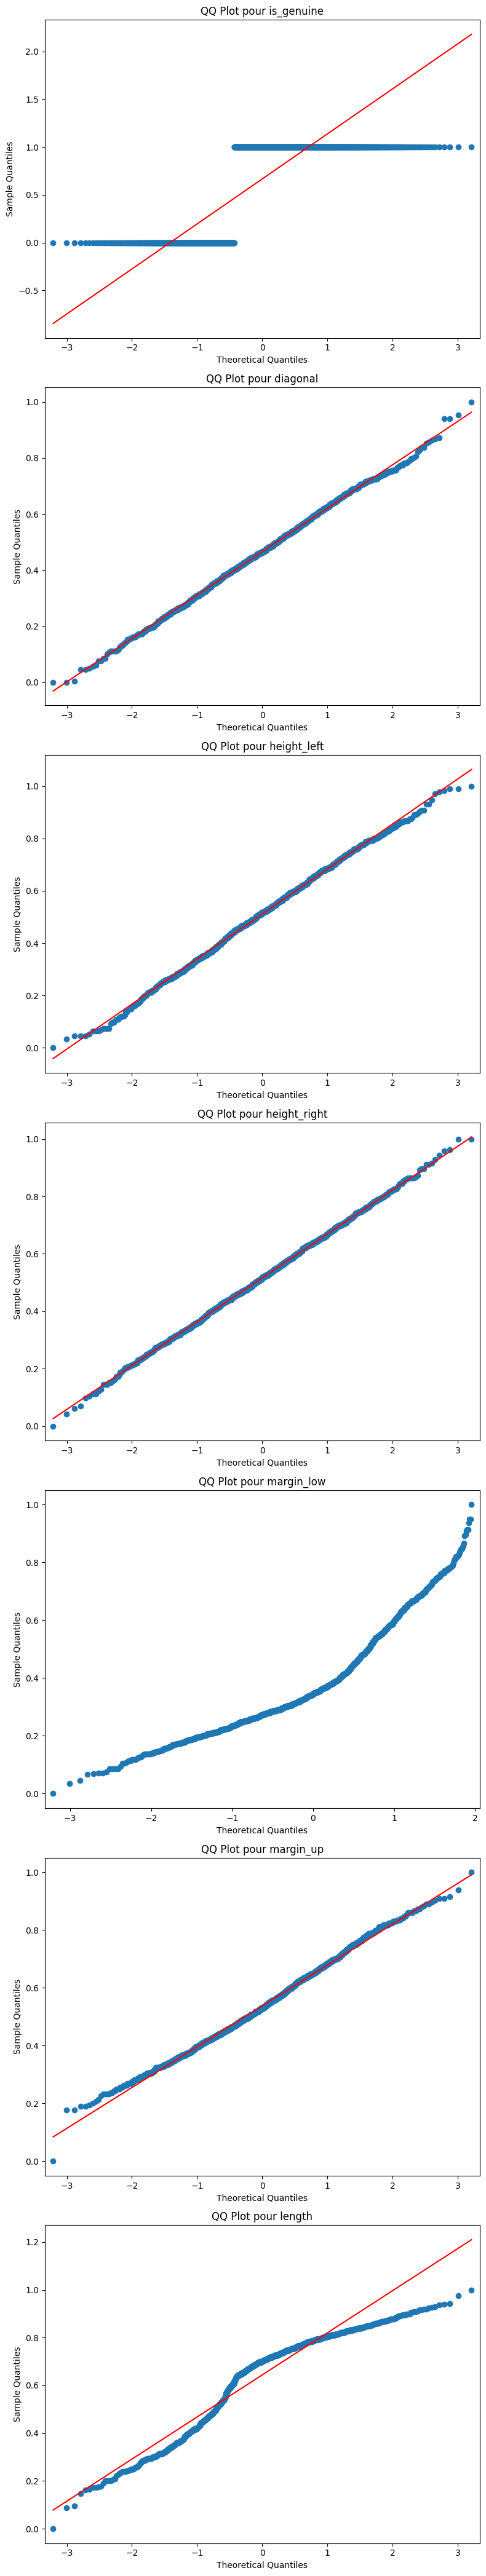

In [50]:
# Importer le module statsmodels.api et pylab
import statsmodels.api as sm
import pylab

# Création de la figure avec des sous-graphiques
fig, axes = plt.subplots(len(data.columns), 1, figsize=(8, 6 * len(data.columns)))

# Itérer sur chaque colonne
for i, col in enumerate(data.columns):
    # Tracer le QQ plot pour la colonne actuelle
    sm.qqplot(data[col], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot pour {col}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

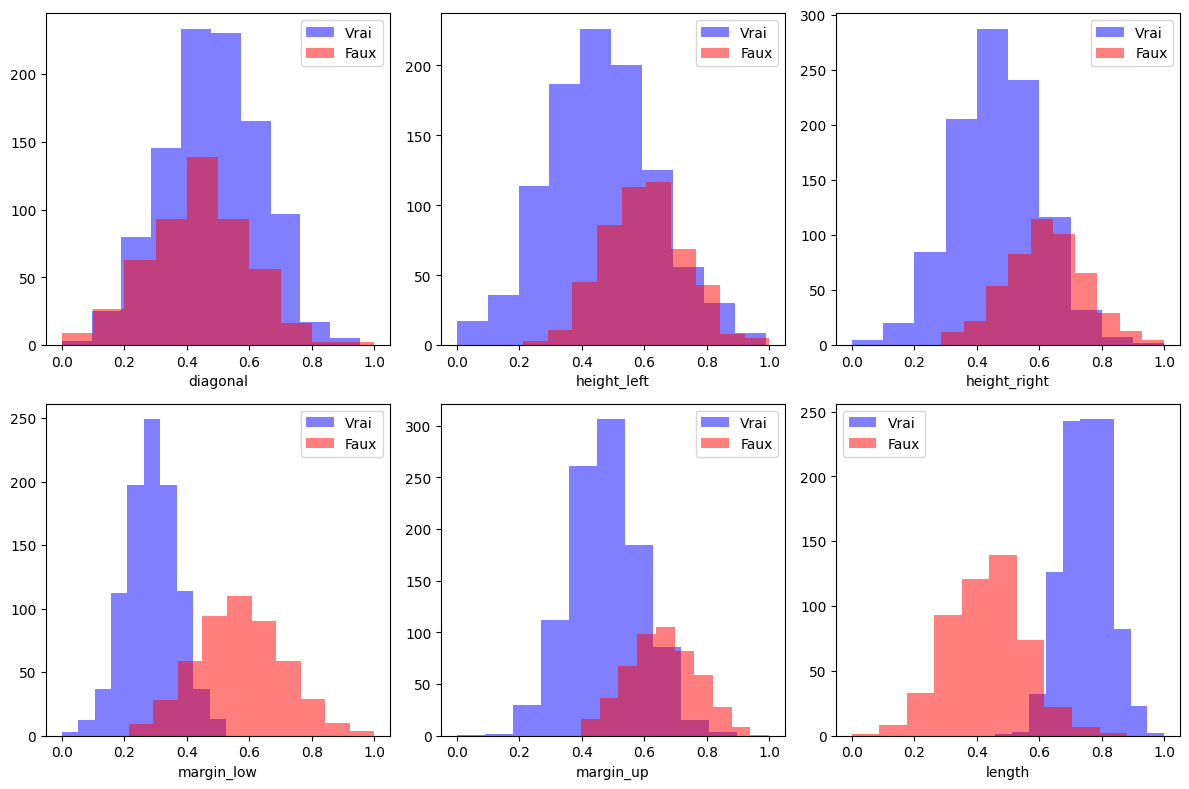

In [51]:
# Sélectionner les colonnes de dimensions
dimensions = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
dimensions_data = data[dimensions]

# Créer un subplot de 2x3 pour les histogrammes des dimensions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Parcourir les dimensions et créer les histogrammes correspondants
for i, dim in enumerate(dimensions):
    ax = axes[i // 3, i % 3]

    # Séparer les données en fonction de la valeur de la colonne "is_genuine"
    genuine_data = dimensions_data[data['is_genuine']]
    fake_data = dimensions_data[~data['is_genuine']]

    # Tracer les histogrammes pour les vrais billets en bleu et les faux billets en rouge
    ax.hist(genuine_data[dim], bins=10, color='blue', alpha=0.5, label='Vrai')
    ax.hist(fake_data[dim], bins=10, color='red', alpha=0.5, label='Faux')

    ax.set_xlabel(dim)
    ax.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


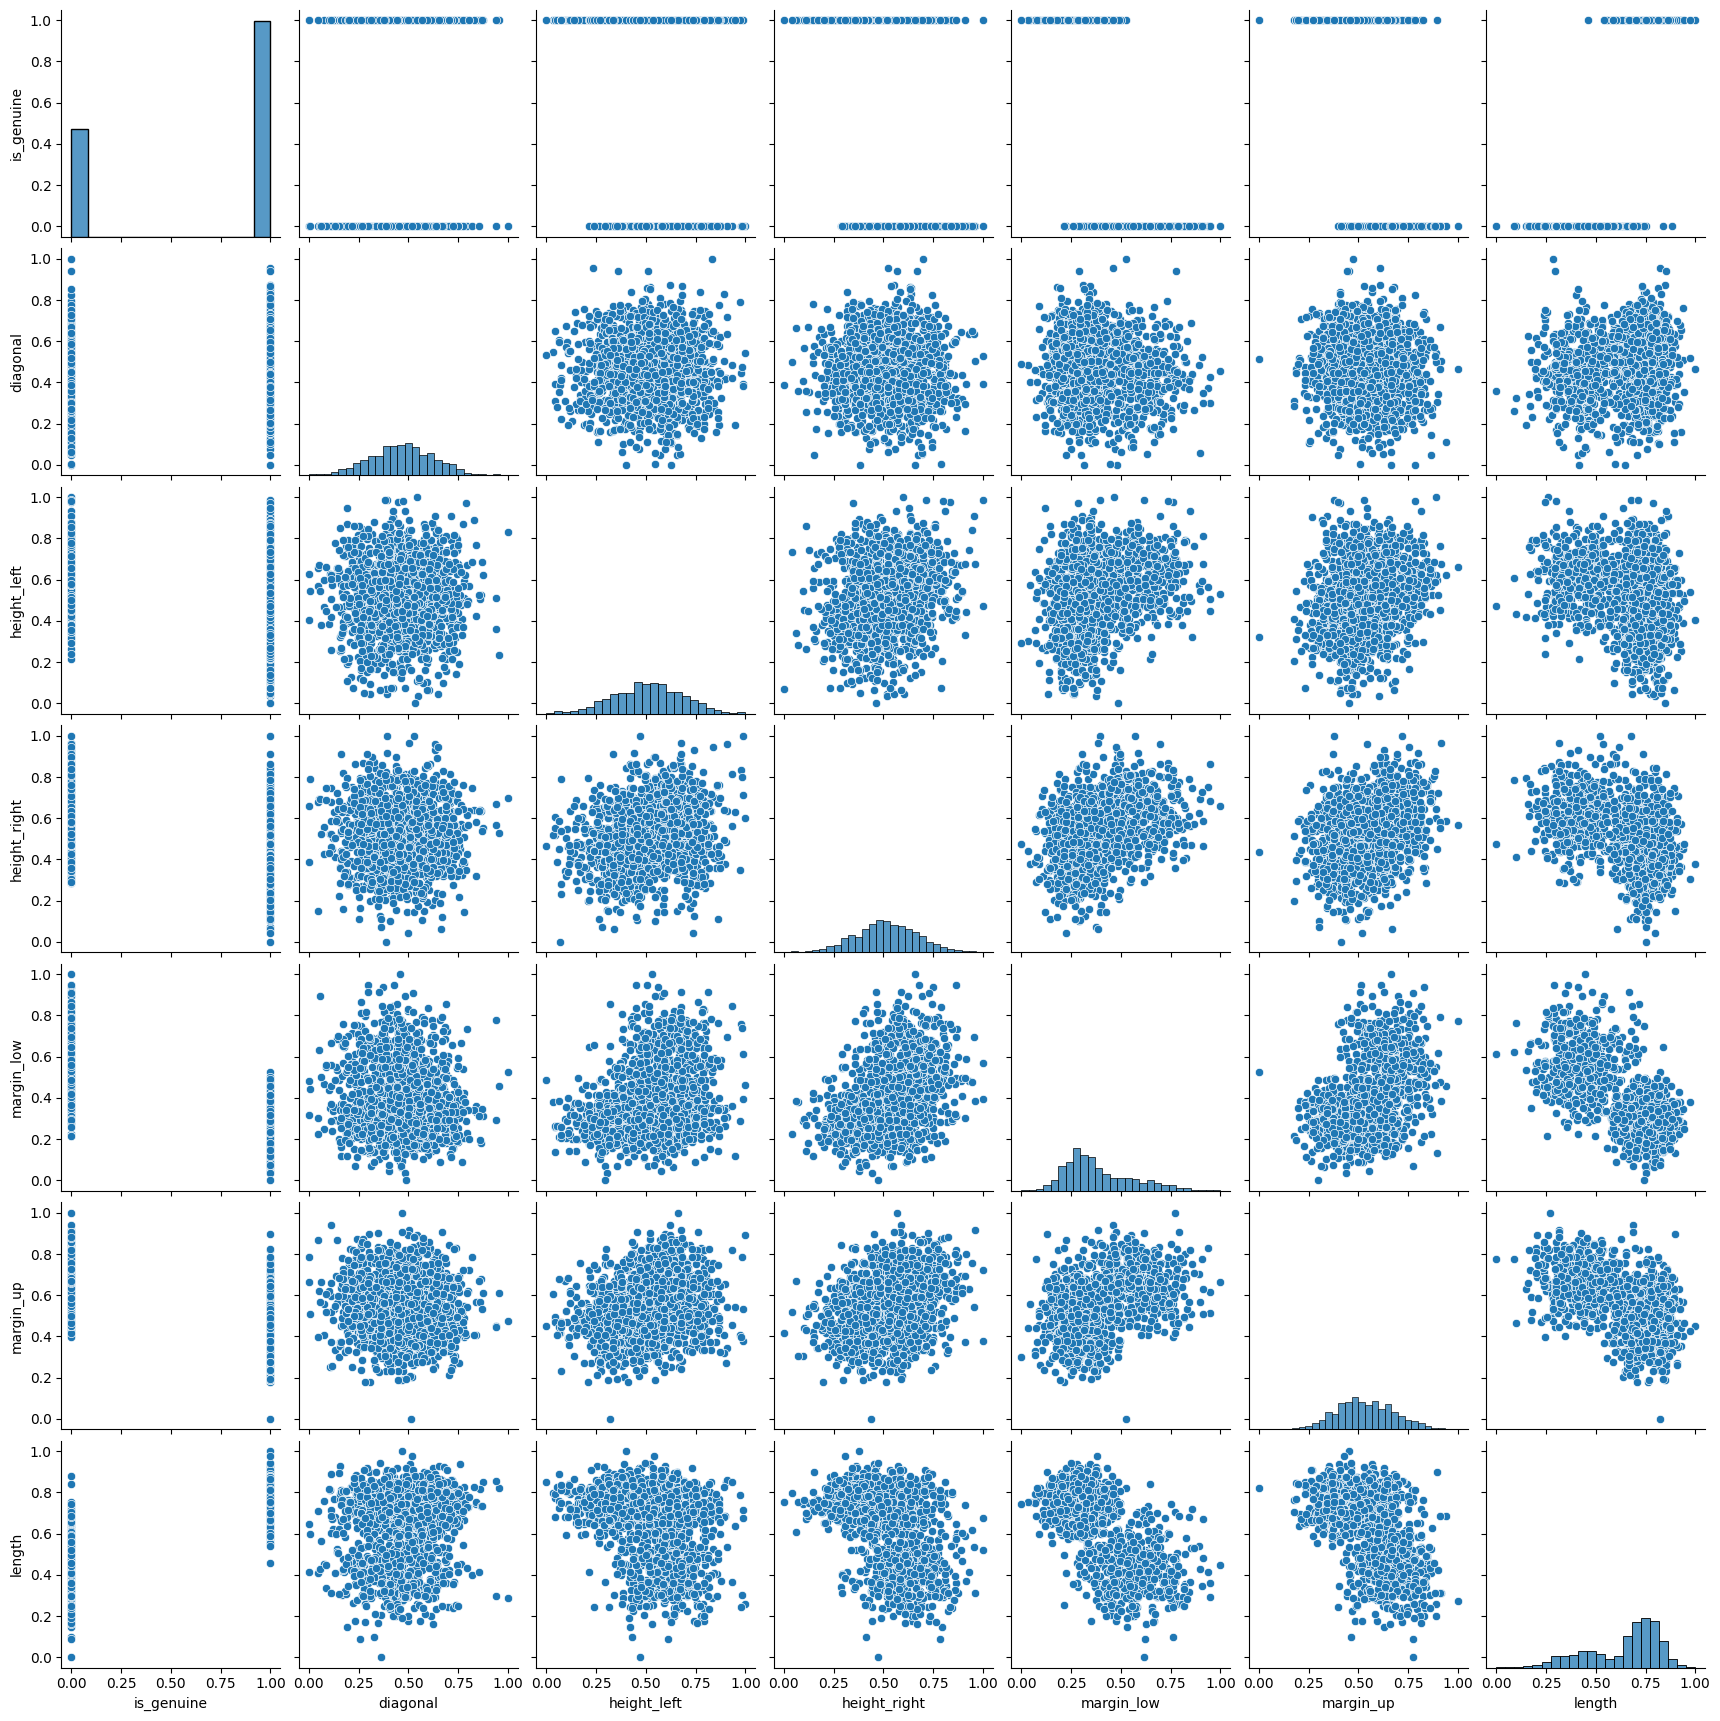

In [52]:
sns.pairplot(data)

## Corrélation

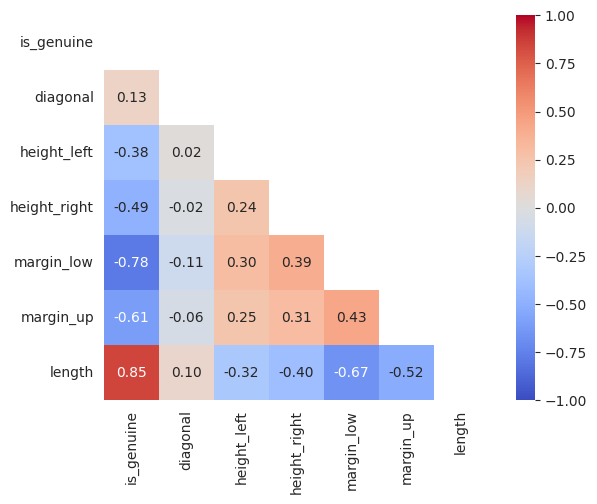

In [53]:
# Création matrice de corrélation
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, fmt=".2f", cmap="coolwarm", square=True)

## Regression linéaire pour les valeurs manquantes

In [54]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [55]:
# Séparer les données en deux ensembles
train_data = data.dropna()  # données sans valeurs manquantes
predict_data = data[data['margin_low'].isna()]  # données avec valeurs manquantes dans 'margin_low'

#Selection de length car la correlation est la plus forte
# Préparer les données pour l'entraînement
X_train = train_data[['length']]
y_train = train_data['margin_low']

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs manquantes
X_predict = predict_data[['length']]
predicted_values = model.predict(X_predict)

In [56]:
# from sklearn.model_selection import cross_val_score

# # Entraîner le modèle avec validation croisée
# scores = cross_val_score(model, X_train, y_train, cv=5)
# print(f"Scores de validation croisée : {scores}")
# print(f"Moyenne des scores de validation croisée : {scores.mean()}")

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Évaluer le modèle sur l'ensemble d'entraînement
train_predictions = model.predict(X_train)
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Erreur absolue moyenne (MAE) : {mae}")

Erreur quadratique moyenne (MSE) : 0.01591694258421377
Erreur absolue moyenne (MAE) : 0.09776195731982164


In [58]:
# Remplacer les valeurs manquantes dans le DataFrame original
data.loc[data['margin_low'].isna(), 'margin_low'] = predicted_values

In [59]:
data.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

## Etude outliers

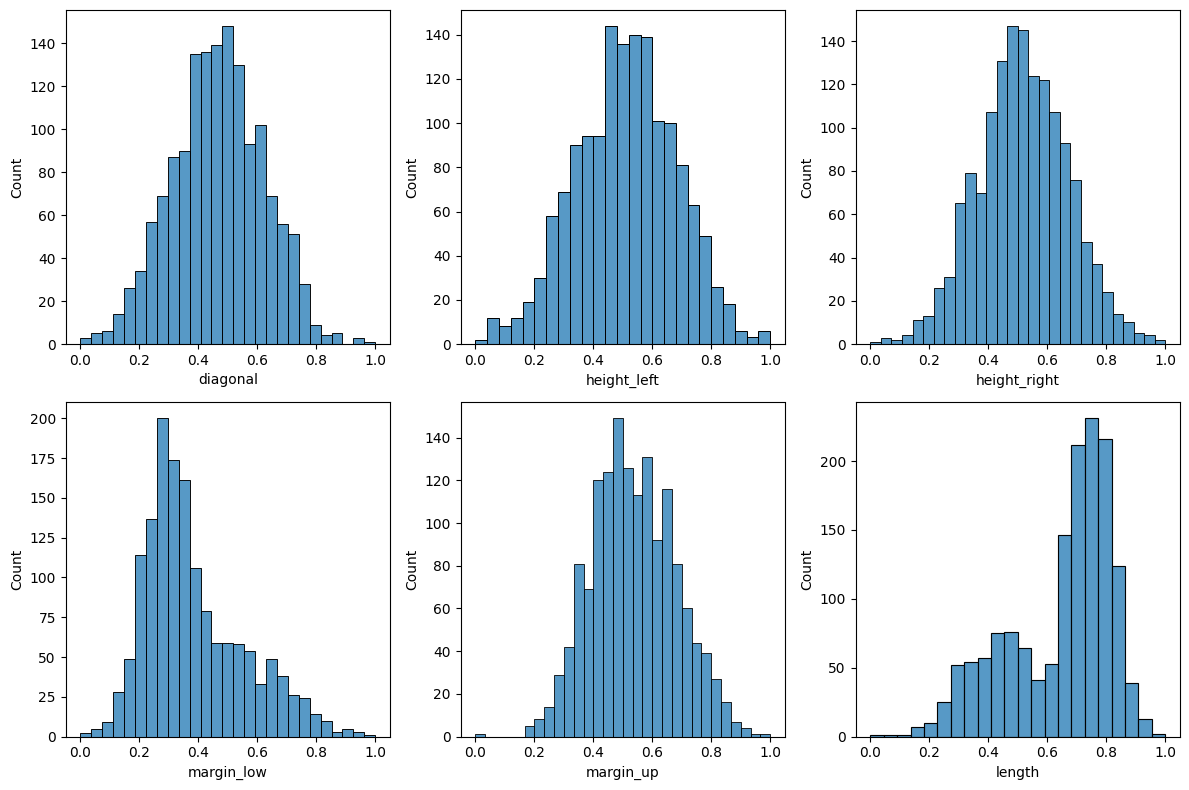

In [60]:
# tracer les distributions des dimensions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.histplot(data.diagonal, ax=axes[0, 0])
sns.histplot(data.height_left, ax=axes[0, 1])
sns.histplot(data.height_right, ax=axes[0, 2])
sns.histplot(data.margin_low, ax=axes[1, 0])
sns.histplot(data.margin_up, ax=axes[1, 1])
sns.histplot(data.length, ax=axes[1, 2])

plt.tight_layout()
plt.show()

Utilsation du Z-score

In [61]:
etude_outliers(data, seuil=2.0)

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'diagonal' est 3.73%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_left' est 4.6%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_right' est 4.27%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_low' est 5.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_up' est 4.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'length' est 3.93%


### Utilisation de log(x)

In [62]:
#transformation des données avec ln(x) pour réduire l'effet des outliers
# for col in column_names:
#     data[col] = np.log(data[col])

### Remplacement des outliers par la médianne

In [63]:
# # Identifie les outliers
# for col in column_names:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
#     print(f"Nombre d'outliers pour {col} : {len(outliers)}")


# # Traite les outliers
# for col in column_names:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     data[col] = data[col].where((data[col] >= Q1 - 1.5*IQR) & (data[col] <= Q3 + 1.5*IQR), data[col].median())

In [64]:
etude_outliers(data, seuil=2.0)

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'diagonal' est 3.73%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_left' est 4.6%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_right' est 4.27%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_low' est 5.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_up' est 4.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'length' est 3.93%


# 3. Modèle de régression Logistique

## Création du modèle

In [103]:
# Séparer le jeu de données en variables explicatives (X) et variable cible (y)
X = data.drop('is_genuine', axis=1)
y = data['is_genuine']

# Séparer le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression logistique
lr = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
lr.fit(X_train, y_train)

LogisticRegression()

In [104]:
# Faire des prédictions sur l'ensemble de test
y_pred_lr = lr.predict(X_test)

## Evaluation du modèle

In [105]:
# Calculer la précision
accuracy_lr = precision_score(y_test, y_pred_lr)
print("Accuracy Score: ", accuracy_lr)

Accuracy Score:  0.979381443298969


Les scores indiquent que le modèle de classification a une performance assez élevée.

- **Precision Score: 0.97** : Cela signifie que lorsque votre modèle prédit qu'une observation appartient à la classe positive, il a raison 94.5% du temps.

- **Recall Score: 0.99** : Cela signifie que votre modèle est capable de trouver 99.47% des observations positives réelles dans l'ensemble de données.

- **F1 Score: 0.98** : Le score F1 est une moyenne harmonique de la précision et du rappel. Un score F1 élevé indique que votre modèle a une bonne précision et un bon rappel.

## Matrice de confusion

### Jeu de test

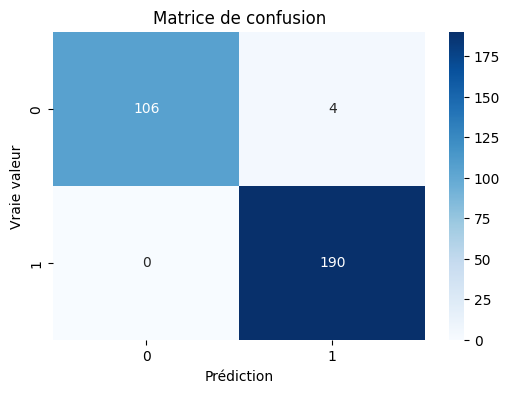

In [106]:
from sklearn.metrics import confusion_matrix

# Créer la matrice de confusion
confusion = confusion_matrix(y_test, y_pred_lr)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

### Jeu d'entrainement

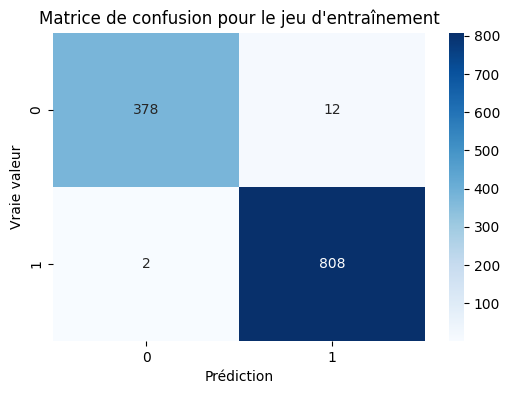

In [110]:
# Utilisez votre modèle pour faire des prédictions sur le jeu d'entraînement
y_train_pred_lr = lr.predict(X_train)

# Créez la matrice de confusion
confusion = confusion_matrix(y_train, y_train_pred_lr)

# Créez un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour le jeu d\'entraînement')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

## Courbe de ROC

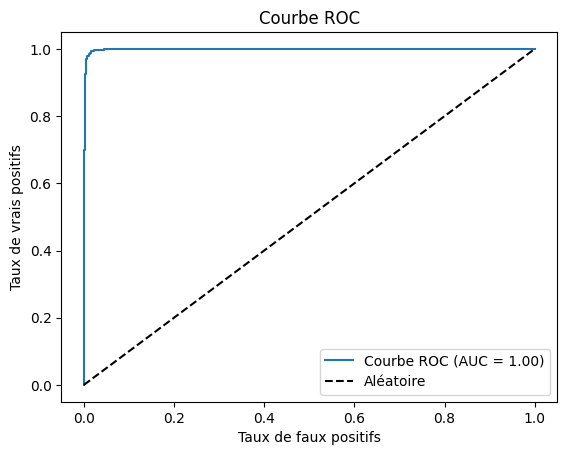

In [108]:
# Définir y_true comme la colonne 'is_genuine' de votre ensemble de données
y_true_lr = data['is_genuine']

# Obtenir les probabilités prédites par le modèle
y_pred_prob = lr.predict_proba(data.drop('is_genuine', axis=1))[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
auc = roc_auc_score(y_true, y_pred_prob)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# 4. Modèle SVC

## Création du modèle

In [112]:
from sklearn.svm import SVC

# Create an instance of the Support Vector Classifier
svc = SVC()

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc.predict(X_test)

## Evaluation

In [113]:
# Evaluate the classifier
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy_svc)

Accuracy: 0.9966666666666667


## Matrice de confusions

### Jeu de test

Matrice de confusion pour SVM :


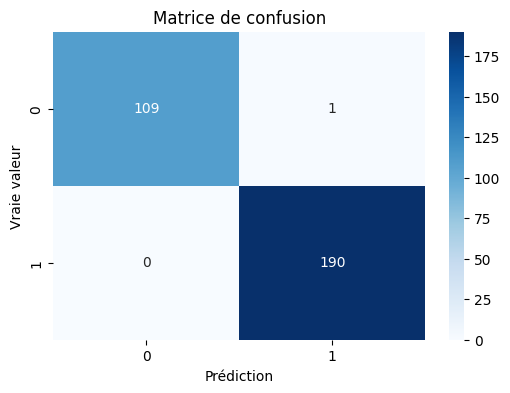

In [114]:
# Créer la matrice de confusion pour le modèle SVM
confusion_svc = confusion_matrix(y_test, y_pred_svc)
print("Matrice de confusion pour SVM :")

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

### jeu d'entrainement

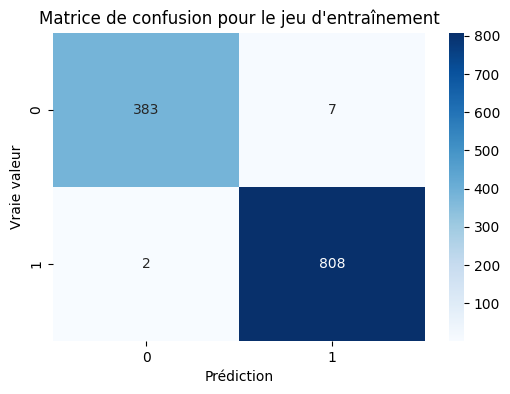

In [115]:
# Utilisez votre modèle pour faire des prédictions sur le jeu d'entraînement
y_train_pred_svm = svm.predict(X_train)

# Créez la matrice de confusion
confusion = confusion_matrix(y_train, y_train_pred_svm)

# Créez un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour le jeu d\'entraînement')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

Le Support Vector Machine (SVM) est un algorithme d'apprentissage automatique utilisé pour résoudre à la fois des problèmes de classification et de régression. Il est particulièrement puissant pour la classification de données dans des espaces multidimensionnels. Les SVM ont été largement utilisés dans de nombreuses applications, y compris la classification d'images, la détection de spam, la classification de textes, la reconnaissance de caractères, la prédiction de séries temporelles, et bien d'autres.

Voici quelques concepts clés associés aux SVM :

Séparation des données par un hyperplan : L'objectif principal d'un SVM est de trouver un hyperplan qui maximise la marge entre deux classes de données. L'hyperplan est choisi de manière à maximiser la distance entre les échantillons les plus proches de chaque classe, appelés "vecteurs de support". Cette marge est appelée "marge maximale".

Kernel Trick : Les SVM sont efficaces pour gérer des données qui ne sont pas linéairement séparables. Pour cela, ils utilisent une technique appelée "Kernel Trick". Cela consiste à projeter les données dans un espace de dimension supérieure où elles deviennent linéairement séparables. Les noyaux couramment utilisés incluent le noyau linéaire, le noyau polynomial et le noyau gaussien (RBF).

Réglage des paramètres C et gamma : Les SVM ont deux paramètres importants à régler : C et gamma. Le paramètre C contrôle le compromis entre la maximisation de la marge et la minimisation de l'erreur de classification. Une valeur plus élevée de C permet de minimiser l'erreur de classification au détriment de la marge, tandis qu'une valeur plus faible de C privilégie la maximisation de la marge. Le paramètre gamma contrôle la forme de la décision frontière et l'influence des points de données voisins.

Classification multi-classes : Bien que les SVM soient à l'origine conçus pour la classification binaire, ils peuvent être étendus pour résoudre des problèmes de classification multi-classes à l'aide de techniques telles que l'OvO (One-vs-One) et l'OvR (One-vs-Rest).

SVM pour la régression : Outre la classification, les SVM peuvent également être utilisés pour résoudre des problèmes de régression en ajustant une fonction d'hyperplan pour minimiser l'erreur de prédiction.

Avantages : Les SVM sont connus pour leur capacité à gérer efficacement des données de haute dimension, leur robustesse aux valeurs aberrantes (en raison de la marge maximale), et leur flexibilité grâce au Kernel Trick pour traiter des données non linéaires.

Inconvénients : Les SVM peuvent être sensibles au choix des hyperparamètres, et l'entraînement peut être coûteux en termes de temps et de ressources pour de grandes bases de données.

En résumé, les SVM sont une méthode d'apprentissage automatique puissante et polyvalente qui trouve de nombreuses applications dans la classification et la régression, en particulier lorsque la séparation des données est complexe ou que les données sont de haute dimension. Le choix du noyau et des paramètres appropriés est essentiel pour obtenir de bonnes performances avec les SVM.

# 5. KNN

## Création du modèle

In [116]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

## Evaluation

In [117]:
# Evaluate the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.9833333333333333


## Matrice de confusions

### Jeu de test

Matrice de confusion pour KNN :


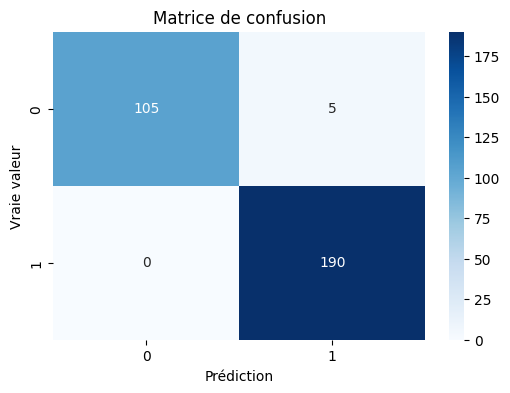

In [118]:
# Créer la matrice de confusion pour le modèle KNN
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print("Matrice de confusion pour KNN :")

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

### Jeu d'entrainement

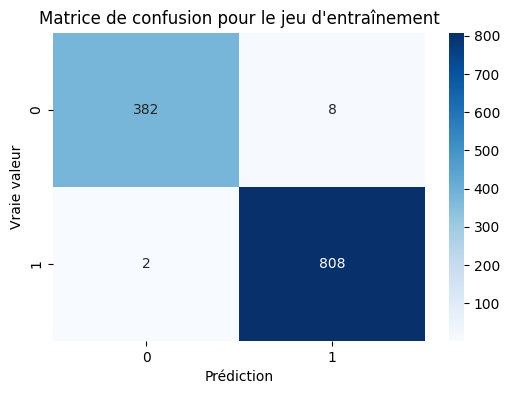

In [120]:
# Utilisez votre modèle pour faire des prédictions sur le jeu d'entraînement
y_train_pred_knn = knn.predict(X_train)

# Créez la matrice de confusion
confusion = confusion_matrix(y_train, y_train_pred_knn)

# Créez un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour le jeu d\'entraînement')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

K-Nearest Neighbors (KNN) est un algorithme d'apprentissage automatique populaire utilisé pour la classification et la régression. Il appartient à la catégorie des méthodes d'apprentissage supervisé, ce qui signifie qu'il utilise des données étiquetées pour effectuer des prédictions sur de nouvelles données non étiquetées. KNN est relativement simple à comprendre et à mettre en œuvre.

Voici comment fonctionne l'algorithme KNN :

Principe de base : L'idée fondamentale derrière KNN est de classer un point de données inconnu en fonction de la classe majoritaire des k points de données les plus proches dans l'espace des caractéristiques (features).

Paramètre K : Le paramètre "k" dans KNN spécifie le nombre de voisins les plus proches que l'algorithme doit considérer lors de la classification d'une nouvelle observation. Par exemple, si k = 3, l'algorithme examinera les trois points de données les plus proches pour déterminer la classe d'un nouvel échantillon.

Méthode de distance : L'algorithme KNN utilise une mesure de distance pour calculer la similarité entre les points de données. La distance euclidienne est la mesure de distance la plus couramment utilisée, mais d'autres, telles que la distance de Manhattan ou la distance de Minkowski, peuvent également être utilisées en fonction du problème.

Vote majoritaire : Une fois que les k voisins les plus proches d'un nouvel échantillon ont été identifiés, chaque voisin vote pour la classe à laquelle il appartient. La classe majoritaire parmi les k voisins est attribuée à l'échantillon inconnu.

Régression KNN : En plus de la classification, KNN peut également être utilisé pour la régression. Dans ce cas, au lieu de voter pour une classe, les k voisins les plus proches contribuent à la valeur de la prédiction en utilisant une moyenne pondérée ou une autre méthode.

Paramètres et surapprentissage : Le choix de la valeur de k est un aspect important de l'utilisation de KNN. Une valeur trop faible de k (par exemple, k=1) peut entraîner une instabilité et un surapprentissage, tandis qu'une valeur trop élevée de k peut lisser excessivement les frontières de décision. Le choix de la distance et la normalisation des caractéristiques peuvent également affecter les performances de KNN.

Inconvénients : KNN peut être sensible à la dimensionnalité des données, et sa performance peut diminuer lorsque le nombre de caractéristiques est élevé. De plus, il peut être sensible aux valeurs aberrantes.

Utilisation pratique : KNN est couramment utilisé dans la recommandation de produits, la classification d'images, la détection d'anomalies, la prédiction de séries temporelles et d'autres domaines où la proximité spatiale des données est un indicateur important pour la prédiction.

En résumé, KNN est un algorithme simple et intuitif qui peut être utilisé pour la classification et la régression. Il est particulièrement adapté lorsque les données sont spatialement liées ou lorsque la dimensionnalité des données n'est pas excessive. Le choix de la valeur de k et de la mesure de distance sont des aspects essentiels de l'utilisation efficace de KNN.

# 6. Comparaison des modèles

In [121]:
# Create a dataframe to store the accuracy scores
models = ['Logistic Regression', 'KNN', 'SVM']
accuracy_scores = [accuracy_lr, accuracy_knn, accuracy_svc]

df_scores = pd.DataFrame({'Model': models, 'Accuracy Score': accuracy_scores})
print(df_scores.head())

                 Model  Accuracy Score
0  Logistic Regression        0.979381
1                  KNN        0.983333
2                  SVM        0.996667


SVM est meilleure de peu

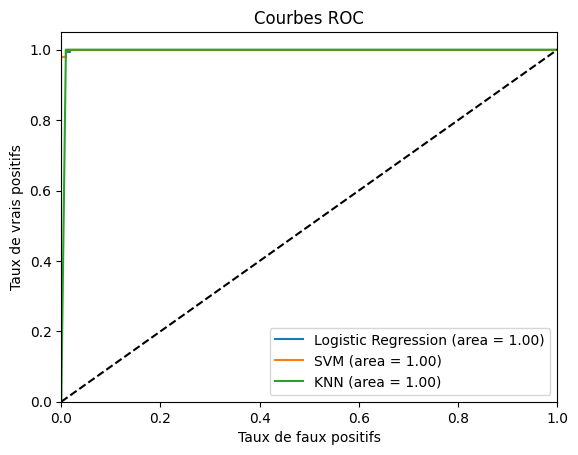

In [122]:
from sklearn.metrics import roc_curve, auc

# Calculer les scores de décision
y_score_logreg = lr.decision_function(X_test)
y_score_svm = svc.decision_function(X_test)
y_score_knn = knn.predict_proba(X_test)[:, 1]

# Calculer les courbes ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)

# Tracer les courbes ROC
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (area = %0.2f)' % auc(fpr_logreg, tpr_logreg))
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % auc(fpr_svm, tpr_svm))
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % auc(fpr_knn, tpr_knn))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

# 7. Test avec l'autre fichier

## import

In [ ]:
# Charger les données de test
file_path='C:\\Users\\antoi\\OneDrive\\Bureau\\OC drive\\OC\\P10\\DATA\\fichiertype.csv'
test_data = pd.read_csv(file_path)
test_data.head()

## Test

In [ ]:
# Supprimer la colonne 'id' car elle n'est pas nécessaire pour la prédiction
test_data = test_data.drop('id', axis=1)

# Utiliser le modèle pour faire des prédictions
y_pred = model.predict(test_data)
print(y_pred)